## Observations and Insights 

Observations:
1.) Comparing the number of total data points to the number of unique mouse id's per drug regimen, we infer that Capomulin and Ramicane are the 2 most successful drugs in keeping the test subjects alive
2.) Comparing the 4 Drug Regimen, we can infer that Capomulin and Ramicane achieved far better results than Infubinol and Ceftamin
3.) We can infer, based on the graph of Tumor size to Weight of Capomulin treated Mice, that Tumor Size is related to the Weight of the mouse

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_metadata = pd.merge(mouse_metadata, study_results, on='Mouse ID', how="outer")
# Display the data table for preview

study_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
# Checking the number of mice.
num_mice = len(study_metadata['Mouse ID'].unique())
num_mice

249

In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_metadata[study_metadata.duplicated(["Mouse ID","Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
study_metadata[study_metadata.duplicated(["Mouse ID","Timepoint"], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = study_metadata.drop_duplicates(subset = ["Mouse ID","Timepoint"], keep = 'first')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

249

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

#Get List of Drugs
drug_regimen = clean_df["Drug Regimen"].unique()
#Create DataFrame to Populate
summary1_df = pd.DataFrame()

#Loop Through Drug List
for drug in drug_regimen:
    working_df = clean_df[clean_df["Drug Regimen"] == f"{drug}"]
    #Aggregate the Summary Stats and input into Summary DF
    stats = working_df["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
    summary1_df[f'{drug}'] = stats   

summary1_df

,Ramicane,Capomulin,Infubinol,Placebo,Ceftamin,Stelasyn,Zoniferol,Ketapril,Propriva,Naftisol
mean,40.216745,40.675741,52.884795,54.033581,52.591172,54.233149,53.236507,55.235638,52.393463,54.331565
median,40.673236,41.557809,51.820584,52.288934,51.776157,52.431737,51.818479,53.698743,50.909965,52.509285
var,23.486704,24.947764,43.128684,61.168083,39.290177,59.450562,48.533355,68.553577,43.138803,66.173479
std,4.846308,4.994774,6.567243,7.821003,6.268188,7.710419,6.966589,8.279709,6.568014,8.134708
sem,0.320955,0.329346,0.492236,0.581331,0.469821,0.573111,0.516398,0.603860,0.525862,0.596466


In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

#Aggregate all Statistics at Once
summary2_df = clean_df[{"Drug Regimen","Tumor Volume (mm3)"}].groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])
summary2_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Data Points per Drug')

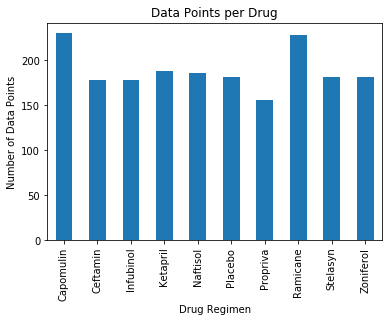

In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#Grouping Mice by Drug Regimen, Counting the Data Points
drug_mice_numb_df = clean_df[{"Mouse ID","Drug Regimen"}].groupby('Drug Regimen')
drug_mice_numb_series = drug_mice_numb_df["Mouse ID"].count()

#Plotting using Pandas and Setting Axes and Titles Using MatPlotLib
drug_mice_numb_series.plot.bar()
plt.ylabel('Number of Data Points')
plt.title('Data Points per Drug')

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

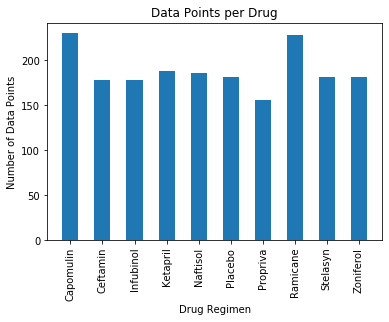

In [48]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#Creating the X axis and plotting it
drug_x_axis =drug_mice_numb_series.index
plt.bar(drug_x_axis,drug_mice_numb_series, width = 0.5)

#Set the X ticks vertically, setting axes labels, and plot title
plt.xticks(rotation = "vertical")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Data Points per Drug')
plt.tight_layout

Text(0.5, 1.0, 'Mice per Drug')

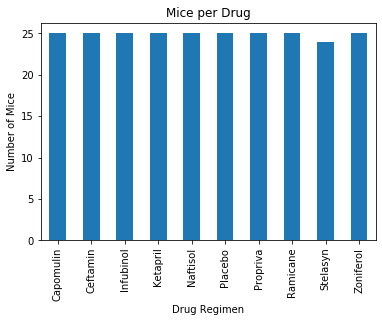

In [47]:
#Grouping Mice by Drug Regimen, Counting the Total Mice for Comparison
drug_mice_numb_df = clean_df[{"Mouse ID","Drug Regimen"}].groupby('Drug Regimen')
drug_mice_numb_unique = drug_mice_numb_df["Mouse ID"].nunique()

#Plotting using Pandas and Setting Axes and Titles Using MatPlotLib
drug_mice_numb_unique.plot.bar()
plt.ylabel('Number of Mice')
plt.title('Mice per Drug')

Sex
Female    930
Male      958
Name: Sex, dtype: int64

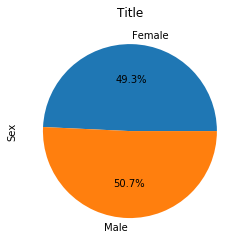

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Grouping the Data by Mouse Sex
mice_sex = clean_df[{"Mouse ID","Sex"}].groupby('Sex')
mice_sex_pie = mice_sex['Sex'].count()

#Plotting the Data using Pandas
mice_sex_pie.plot.pie(y='Sex', title="Title", legend=False, autopct='%1.1f%%')

mice_sex_pie

Text(0.5, 1.0, 'Sex')

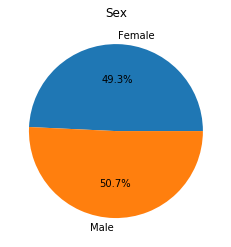

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Plotting the Data using PyPlot
plt.pie(mice_sex_pie, labels = mice_sex_pie.index, autopct="%1.1f%%")
plt.title('Sex')


## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Creating Empty DataFrame to Populate, Generating the List of Specific Drug Regimen
last_timepoint_df = pd.DataFrame()
specific_drug_list = ['Capomulin',"Ramicane",'Infubinol','Ceftamin']

# Filtering Data to only get Specific Drugs, Getting the Unique Mouse IDs
specific_regimen_df = clean_df[clean_df['Drug Regimen'].isin(specific_drug_list)]
mouse_list = specific_regimen_df['Mouse ID'].unique()

#Looping through all the Mice
for mouse in mouse_list:
    #Populating the DataFrame with the last Timepoint of every Mouse taking the Specific Drugs
    df = specific_regimen_df[specific_regimen_df['Mouse ID'] == mouse]
    volume_max = df["Timepoint"].idxmax()
    last_timepoint_df = last_timepoint_df.append(study_metadata.iloc[(volume_max)])

#Dropping Data and Presenting the DataFrame
last_timepoint_df = last_timepoint_df.drop(['Age_months','Metastatic Sites', 'Weight (g)'], 1)
last_timepoint_df

,Drug Regimen,Mouse ID,Sex,Timepoint,Tumor Volume (mm3)
9,Ramicane,k403,Male,45.0,22.050126
19,Capomulin,s185,Female,45.0,23.343598
29,Capomulin,x401,Female,45.0,28.484033
39,Capomulin,m601,Male,45.0,28.430964
49,Ramicane,g791,Male,45.0,29.128472
...,...,...,...,...,...
1797,Ceftamin,x822,Male,45.0,61.386660
1813,Infubinol,y163,Female,45.0,67.685569
1845,Ceftamin,y769,Female,45.0,68.594745
1855,Ceftamin,y865,Male,45.0,64.729837


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.     
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

#Creating Empty Lists and Empty DataFrame
tumor_vol_list = []
data_to_plot = []
outliers_df = pd.DataFrame(columns = ['Quartile 1', 'Quartile 3', 'IQR', 'Upper Outlier Bound',
                                      'Lower Outlier Bound', 'Upper Outliers','Lower Outliers', 'Drug Regimen'])

#Looping through each Specific Drug
for spdrug in specific_drug_list:
    
    #Creating DataFrame to get Tumor Volume, Getting List of Tumor Volume
    df = last_timepoint_df[last_timepoint_df['Drug Regimen'] == spdrug]
    tumor_vol_list = df['Tumor Volume (mm3)']
    
    #Get Summary Statistics, Creating Empty List for Potential Outliers
    q1 = np.percentile(tumor_vol_list, 25)
    q3 = np.percentile(tumor_vol_list, 75)
    iqr = q3-q1
    upper = q3 + (1.5* iqr)
    lower = q1 - (1.5 * iqr)
    u_out = []
    l_out = []
    
    #Looping through each Data per Specific Drug, finding Outliers and populating lists
    for i in tumor_vol_list:
        if i >= upper:
            u_out.append(i)
        elif i <= lower:
            l_out.append(i)
        
    # Populating the Empty Summary Data Frame
    outliers_df = outliers_df.append([{'Quartile 1' : q1, 'Quartile 3': q3, 'IQR':iqr, 'Upper Outlier Bound': upper,
                                      'Lower Outlier Bound': lower, 'Upper Outliers': f'{u_out}','Lower Outliers': f'{l_out}',
                                       'Drug Regimen': spdrug}])
    # Replacing Empty lists with 'None'
    outliers_df = outliers_df.replace(f'[]','None')
    data_to_plot.append(tumor_vol_list)

# Setting Drug Regimen as Index and Presenting Summary DF
outliers_df = outliers_df.set_index('Drug Regimen')
outliers_df

,Quartile 1,Quartile 3,IQR,Upper Outlier Bound,Lower Outlier Bound,Upper Outliers,Lower Outliers
Drug Regimen,,,,,,,
Capomulin,32.377357,40.159220,7.781863,51.832015,20.704562,None,None
Ramicane,31.560470,40.659006,9.098537,54.306811,17.912664,None,None
Infubinol,54.048608,65.525743,11.477135,82.741446,36.832905,None,[36.321345799999996]
Ceftamin,48.722078,64.299830,15.577752,87.666458,25.355450,None,None


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

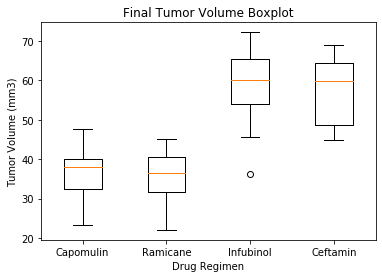

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(data_to_plot, labels = specific_drug_list)

# Setting Axes Labels and Titles
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Final Tumor Volume Boxplot')
plt.tight_layout

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

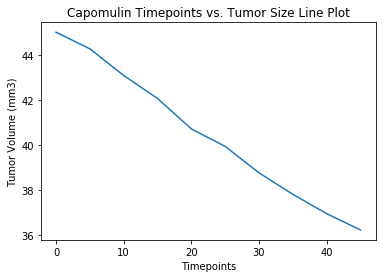

In [34]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Filtering by Drug, Dropping Irrelevant Datam Grouping by Timepoint
capo_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
capo_df = capo_df.drop(['Drug Regimen','Sex','Age_months','Metastatic Sites'], 1)
capo_line = capo_df.groupby(['Timepoint'])

#Plotting
plt.plot(capo_line.count().index, capo_line['Tumor Volume (mm3)'].mean())

#Setting Title, and Axes Labels
plt.title('Capomulin Timepoints vs. Tumor Size Line Plot')
plt.xlabel('Timepoints')
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Tumor Volume (mm3)')

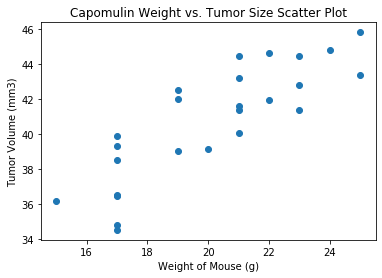

In [49]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Grouping by Individual Mice
capo_scatter = capo_df.groupby(['Mouse ID'])

#Setting Axes
x_axis = capo_scatter['Weight (g)'].mean() 
y_axis = capo_scatter['Tumor Volume (mm3)'].mean()

#Plotting
plt.scatter(x_axis,y_axis)

#Setting Title and Axes Labels
plt.title('Capomulin Weight vs. Tumor Size Scatter Plot')
plt.xlabel('Weight of Mouse (g)')
plt.ylabel('Tumor Volume (mm3)')

## Correlation and Regression

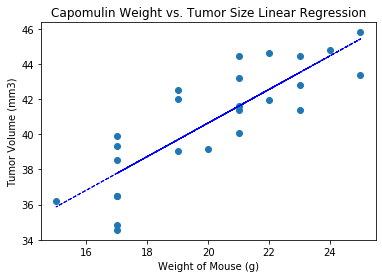

The Correlation Coefficient is 0.842


In [52]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Finding Correlation Coefficients
(corr_coeff, _) = st.pearsonr(x_axis ,y_axis)

#Finding Line of Best Fit
(slope, intercept, _, _, _) = st.linregress(x_axis ,y_axis)
fit = slope * x_axis + intercept

#Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--', linewidth = 1)

#Setting Title and Axes Labels
plt.title("Capomulin Weight vs. Tumor Size Linear Regression")
plt.xlabel('Weight of Mouse (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

print(f'The Correlation Coefficient is {corr_coeff.round(3)}')